In [10]:
# pca_exploration.ipynb
# Noah Stiegler
# 6/27/24
# Exploring the Principal Component Analysis (PCA) method
# for analyzing hits data from COSMIC at high frequencies

In [11]:
## Setup
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from astropy import units as u
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.time import Time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
# Read in the data

# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1":
    full_dataset_path = "/datax/scratch/nstieg/25GHz_higher.pkl"
    coherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_coherent.pkl"
    incoherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_incoherent.pkl"
else:
    raise Exception("Data path not known")

# Read in data
coherent = pd.read_pickle(coherent_dataset_path)
# incoherent = pd.read_pickle(incoherent_dataset_path)
# df = pd.read_pickle(full_dataset_path)

In [28]:
# Get rid of columns that aren't numbers
columns_we_care_about = [
    "signal_frequency",
    "signal_drift_rate",
	"signal_snr",
	"signal_beam",
	"signal_power",
	"signal_incoherent_power",
    "signal_num_timesteps",
	"tstart",
	"ra_hours",
	"dec_degrees",
    "source_name"]

data = coherent[columns_we_care_about]
print(data.shape)

(2984740, 11)


In [29]:
# Normalize (standardize) the data to have mean 0 and std dev of 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [30]:
# Create PCA object
pca = PCA()

# Fit PCA to the data
pca.fit(scaled_data)  # Use scaled_data if standardized, df if not standardized

PCA()

In [31]:
principal_components = pca.transform(scaled_data)  # Use scaled_data if standardized, df if not standardized

In [32]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("Columns:", data.columns)
print(explained_variance.shape)

Explained variance ratio: [2.68399930e-01 2.28367331e-01 1.36004384e-01 9.09125959e-02
 9.01667248e-02 8.96673652e-02 5.45199077e-02 3.40505338e-02
 5.70744337e-03 2.20377219e-03 1.18006871e-08]
Columns: Index(['signal_frequency', 'signal_drift_rate', 'signal_snr', 'signal_beam',
       'signal_power', 'signal_incoherent_power', 'signal_num_timesteps',
       'tstart', 'ra_hours', 'dec_degrees', 'source_name'],
      dtype='object')
(11,)


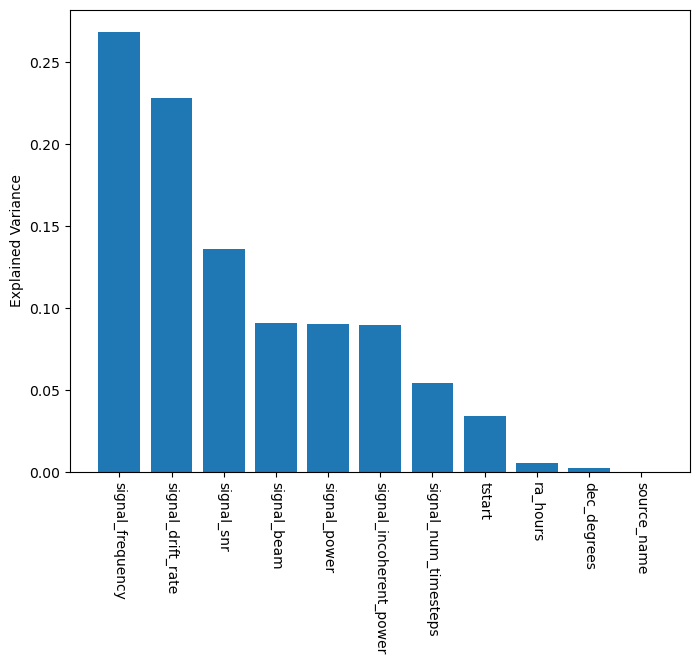

In [34]:
# Plot explained variance
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data.columns, explained_variance)
plt.xticks(rotation=-90) 
plt.ylabel("Explained Variance")
plt.show()

Text(0, 0.5, 'Variance Explained by Components')

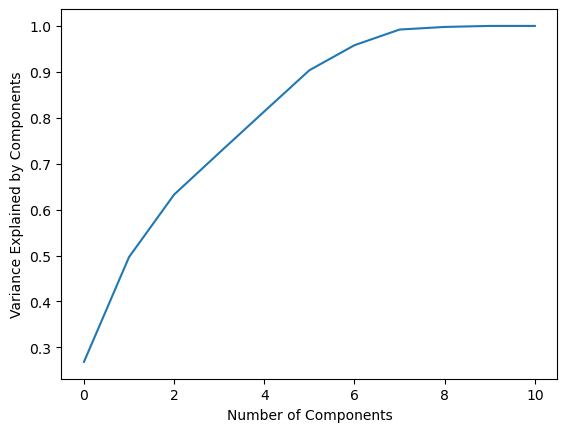

In [37]:
# Plot cumulative variance with number of columns
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(len(data.columns)), cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained by Components")

In [17]:


# Principal components (eigenvectors)
components = pca.components_
print("Principal components (eigenvectors):")
print(components)

Explained variance ratio: [2.59504474e-01 2.42483694e-01 1.27125238e-01 1.04990856e-01
 8.33345338e-02 8.26187304e-02 5.27729177e-02 3.19040767e-02
 8.64153120e-03 5.23176743e-03 1.39217059e-03 1.08172953e-08]
Principal components (eigenvectors):
[[-4.33093862e-01 -4.30808162e-01  1.60971218e-04  2.35871730e-01
   6.54773313e-02  2.40654355e-01  2.40662459e-01  2.03091720e-01
  -3.11380479e-01 -4.18798188e-01 -2.69016538e-01  2.55171406e-01]
 [ 1.89023428e-01  2.24089894e-01 -7.68406744e-05  5.18426608e-01
  -3.21264007e-02  5.26695917e-01  5.26690322e-01 -7.59538468e-02
   9.11275767e-02  2.03320744e-01  1.60803369e-01 -9.04104424e-02]
 [-1.67244843e-01 -1.54652682e-01 -6.84821256e-04  3.29656369e-02
  -9.88925219e-02  2.93819584e-02  2.93684455e-02 -5.78507925e-01
   2.26346296e-01 -6.34813445e-02 -5.21637632e-01 -5.22952395e-01]
 [ 3.92164741e-01 -3.96154385e-01  2.76337583e-03  2.15273184e-02
   9.63121787e-03  2.56298934e-02  2.56380470e-02  3.46099835e-01
   6.26344350e-01 -3.866

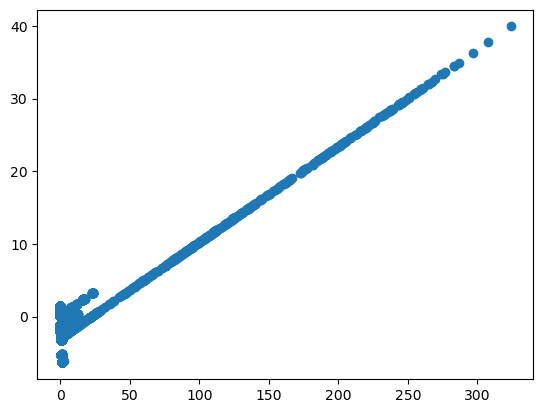

In [38]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])